In [1]:
import sys
sys.path.append(r'../../HelperFunctions')
import DataHelper as dh
import AugHelper as ah
import ModelConfigHelper as mch

In [2]:
path_info = dh.getFileDirectory()
path_info

Please enter the root directory of the file path -> C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soil-Type\dataset\Soil-Classifier


{'path': 'C:\\Users\\user\\Desktop\\ML\\PyTorch\\Hackathon\\Soil-Type\\dataset\\Soil-Classifier',
 'type': 'folder'}

In [3]:
dh.showFileCount(pathInfo=path_info)

No_Soil :-
250
Soil :-
221


In [4]:
df = dh.getDataFrame(pathInfo=path_info)
df.info()
df.dtypes
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   imgPath       471 non-null    object  
 1   label         471 non-null    category
 2   augmentation  471 non-null    object  
dtypes: category(1), object(2)
memory usage: 8.1+ KB


imgPath    label augmentation
0    C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...  No_Soil       normal
1    C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...  No_Soil       normal
2    C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...  No_Soil       normal
3    C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...     Soil       normal
4    C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...  No_Soil       normal
..                                                 ...      ...          ...
466  C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...     Soil       normal
467  C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...  No_Soil       normal
468  C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...  No_Soil       normal
469  C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...  No_Soil       normal
470  C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...  No_Soil       normal

[471 rows x 3 columns]

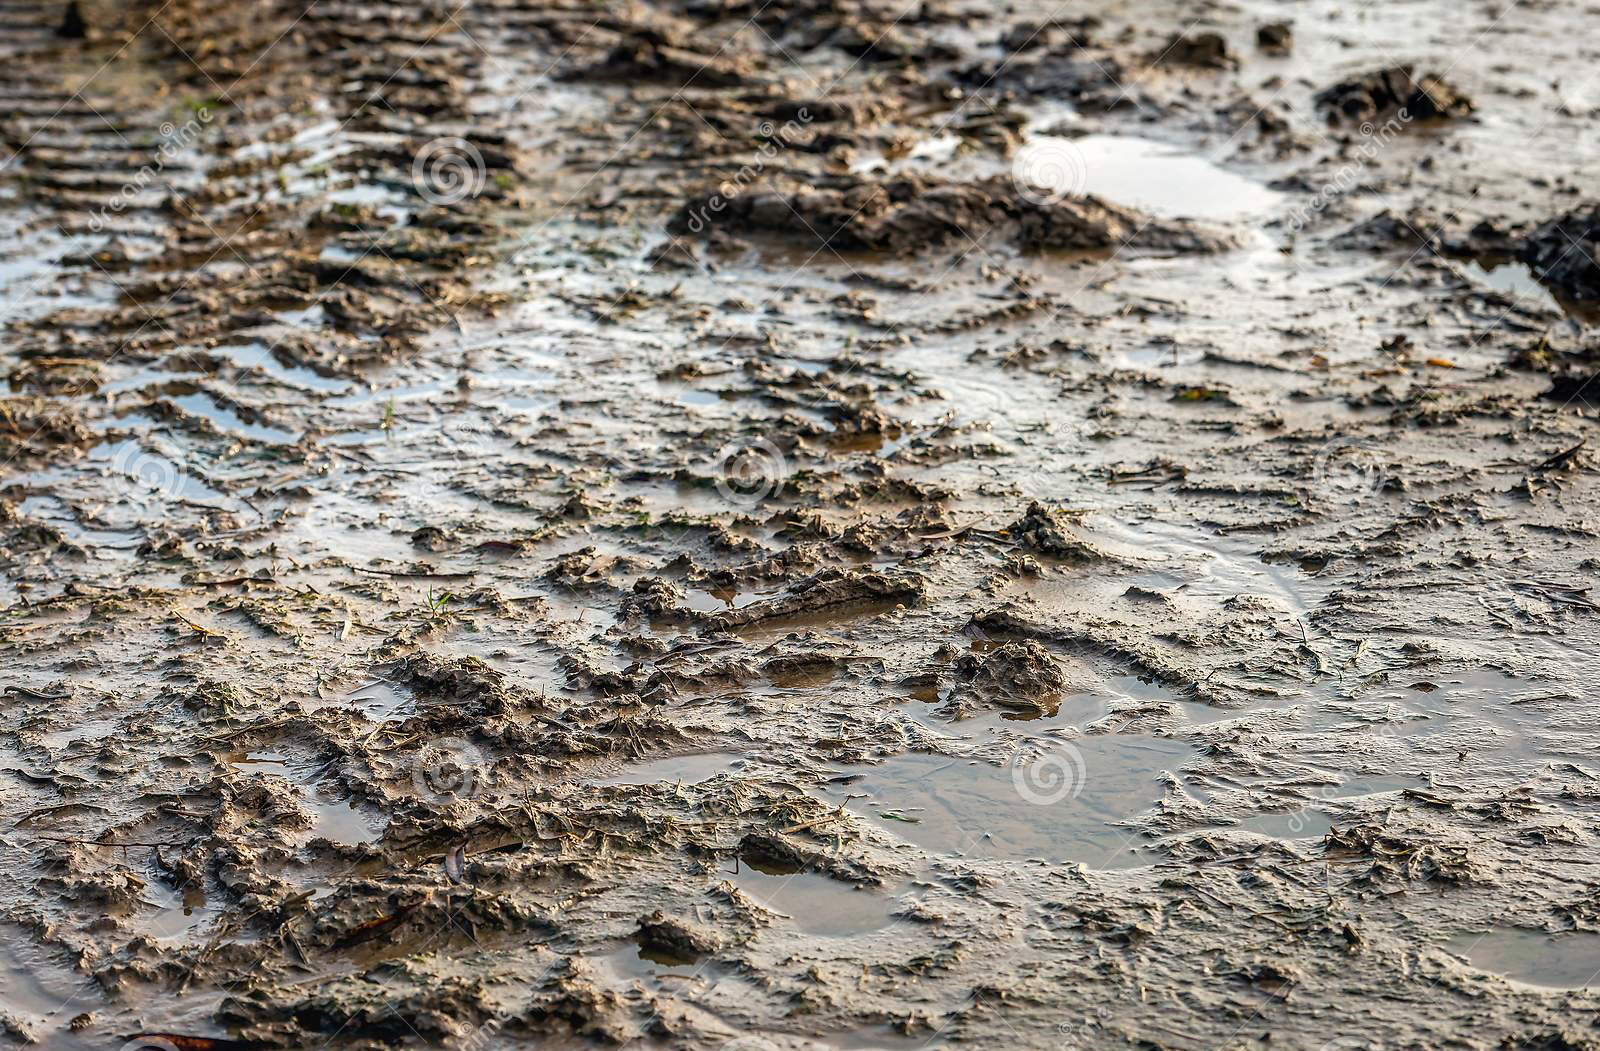

In [5]:
from PIL import Image
img = Image.open(df.iloc[5,0])
img

In [6]:
dictlabels=dh.getLabelDicts(df=df)
dictlabels

Index(['No_Soil', 'Soil'], dtype='object')

In [7]:
df = dh.dfPreProcess(df=df)
df.info()
df.dtypes
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   imgPath       471 non-null    object
 1   augmentation  471 non-null    object
 2   ylabel        471 non-null    int8  
dtypes: int8(1), object(2)
memory usage: 7.9+ KB


imgPath augmentation  ylabel
0    C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...       normal       0
1    C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...       normal       0
2    C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...       normal       0
3    C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...       normal       1
4    C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...       normal       0
..                                                 ...          ...     ...
466  C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...       normal       1
467  C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...       normal       0
468  C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...       normal       0
469  C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...       normal       0
470  C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...       normal       0

[471 rows x 3 columns]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_val = train_test_split(df,test_size=0.15)

In [9]:
augDict = ah.getAugmentation(augmentRequired=True,augmentPolicies=[ah.transforms.AutoAugmentPolicy.IMAGENET])
augDict

{'hFlip': RandomHorizontalFlip(p=1),
 'vFlip': RandomVerticalFlip(p=1),
 'rot': RandomRotation(degrees=[-90.0, 90.0], interpolation=nearest, expand=False, fill=0),
 'aug0': AutoAugment(policy=AutoAugmentPolicy.IMAGENET, fill=None)}

In [10]:
imgTransform = ah.getImageTransform(227)
imgTransform

Compose(
    Resize(size=(227, 227), interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)

In [11]:
X_train = ah.augmentDataFrame(df=X_train,augDict=augDict)
X_train
X_train['augmentation'].unique()

array(['rot', 'hFlip', 'normal', 'vFlip', 'aug0'], dtype=object)

In [12]:
X_val
X_val['augmentation'].unique()

array(['normal'], dtype=object)

In [13]:
train_ds  = ah.KroniaDataset(data=X_train,transforms=imgTransform)
val_ds = ah.KroniaDataset(data=X_train,transforms=imgTransform)

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

In [15]:
train_dl = DataLoader(dataset=train_ds,batch_size=32,shuffle=True)
val_dl = DataLoader(dataset=val_ds,batch_size=32,shuffle=True)

In [16]:
torch.manual_seed(42)
model = mch.getCustomizedPreTrainedModel('alexnet',len(dictlabels),True)

In [17]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [19]:
train_loss,val_loss = mch.trainModel(model=model,train_dl=train_dl,val_dl=val_dl,criterion=criterion,optim=optimizer,train_samples=len(X_train),batch_size=32,soft_max=True)

============= New Epoch =========================
epoch:  0  batch:    2 [    64/2000]  loss: 0.49389473      accuracy:  57.812%
epoch:  0  batch:    4 [   128/2000]  loss: 0.22538358      accuracy:  72.656%
epoch:  0  batch:    6 [   192/2000]  loss: 0.33879668      accuracy:  75.521%
epoch:  0  batch:    8 [   256/2000]  loss: 0.05441928      accuracy:  80.078%
epoch:  0  batch:   10 [   320/2000]  loss: 0.07053941      accuracy:  83.125%
epoch:  0  batch:   12 [   384/2000]  loss: 0.08218827      accuracy:  85.156%
epoch:  0  batch:   14 [   448/2000]  loss: 0.20349251      accuracy:  86.161%
epoch:  0  batch:   16 [   512/2000]  loss: 0.02030288      accuracy:  87.891%
epoch:  0  batch:   18 [   576/2000]  loss: 0.06059793      accuracy:  88.889%
epoch:  0  batch:   20 [   640/2000]  loss: 0.05985009      accuracy:  89.844%
epoch:  0  batch:   22 [   704/2000]  loss: 0.01626237      accuracy:  90.767%
epoch:  0  batch:   24 [   768/2000]  loss: 0.03240826      accuracy:  91.536%
ep

epoch:  3  batch:   20 [   640/2000]  loss: 0.00055247      accuracy: 100.000%
epoch:  3  batch:   22 [   704/2000]  loss: 0.00403863      accuracy: 100.000%
epoch:  3  batch:   24 [   768/2000]  loss: 0.00132930      accuracy: 100.000%
epoch:  3  batch:   26 [   832/2000]  loss: 0.00073936      accuracy: 100.000%
epoch:  3  batch:   28 [   896/2000]  loss: 0.00674053      accuracy: 100.000%
epoch:  3  batch:   30 [   960/2000]  loss: 0.00080018      accuracy: 100.000%
epoch:  3  batch:   32 [  1024/2000]  loss: 0.00253882      accuracy: 100.000%
epoch:  3  batch:   34 [  1088/2000]  loss: 0.00196413      accuracy: 100.000%
epoch:  3  batch:   36 [  1152/2000]  loss: 0.00277211      accuracy: 100.000%
epoch:  3  batch:   38 [  1216/2000]  loss: 0.00116382      accuracy: 100.000%
epoch:  3  batch:   40 [  1280/2000]  loss: 0.00070310      accuracy: 100.000%
epoch:  3  batch:   42 [  1344/2000]  loss: 0.00293529      accuracy: 100.000%
epoch:  3  batch:   44 [  1408/2000]  loss: 0.002756

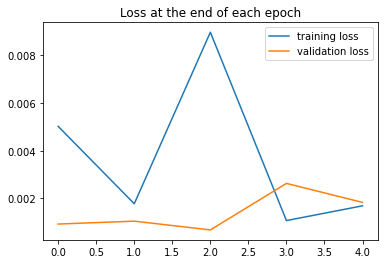

In [20]:
mch.visualiziseTrainResults(train_losses=train_loss,test_losses=val_loss)

In [21]:
# mch.saveModel(model=model,filename="SoilNetWeights")